<a href="https://colab.research.google.com/github/Tetratic/MLA_BSJ/blob/main/MLA4_BSJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 4
### Brian Johnston
### CS430-ON
### Machine Learning in the Cloud

# General Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from sklearn.model_selection import train_test_split as tts
from sklearn.pipeline import Pipeline as plne
from sklearn.compose import ColumnTransformer as ctrans
from sklearn.preprocessing import MinMaxScaler as mmscal
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [4]:
def plot_cm(y_test,y_pred):
  cm = confusion_matrix(y_test,y_pred)
  fig = plt.figure(figsize=(10,10))
  heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')

# Imports for Specific Modules

In [5]:
from sklearn import tree
from sklearn.tree import export_text

#SVC Classification - Acquire Data

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/MLA_Data/banknote_authentication.csv')

# Splitting Data into Train/Test

In [7]:
X=df
X=X.drop(columns=['forgery'])

In [8]:
y=df['forgery']

In [9]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=.2,random_state=0)

# Building the Pipeline

In [10]:
nums = ['variance','skewness','curtosis','entropy']
cats = ['forgery']

In [11]:
col_trans = ctrans(transformers=[('num',mmscal(),nums)], remainder='passthrough')

In [14]:
pipeline = plne([('transform',col_trans),('decision_tree',tree.DecisionTreeClassifier(max_depth=5))])

In [15]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

# Executing the Model

In [16]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

# Evaluating the Model

In [17]:
y_pred = pipeline.predict(X_test)

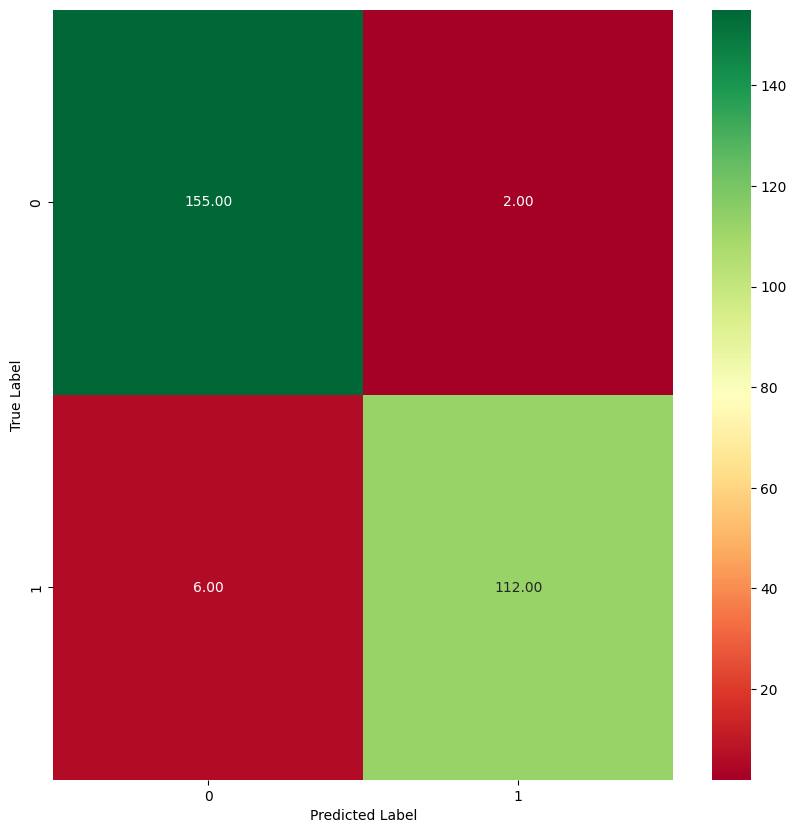

In [18]:
plot_cm(y_test,y_pred)

In [19]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9824561403508771
0.9491525423728814
0.9655172413793103


These results indicate that our model is very good for our probblem. With a precision score of ~98% and a recall score of ~94%, we can see the accuracy of the model. Thew combined F1 score of ~96% is a very good metric to judge our model by, and reaffirms that the model is good at predicting our problem.

# Conclusion
This model is a very good fit for the data provided, and will be able to accurately identify whether a given banknote is a forgery. It only made 8 mistakes out of 275 data points, and has a very high F1 score of around 96.5%. Thus, this model is suitable for making the prediction of forgery of banknotes.

#Acquire Data

In [20]:
df = pd.read_csv('/content/gdrive/MyDrive/MLA_Data/Steel_industry_data.csv')

In [21]:
df.rename(columns={'Usage_kWh':'usage_kwh','Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh','Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh','Lagging_Current_Power_Factor':'lag_current_pwr','Leading_Current_Power_Factor':'lead_current_pwr','NSM':'nsm','WeekStatus':'week_status','Day_of_week':'day_of_week','Load_Type':'load_type'}, inplace=True)

# Splitting Data into Train/Test

In [22]:
X=df
X=X.drop(columns=['date','usage_kwh'])

In [23]:
y=df['usage_kwh']

In [24]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=.2,random_state=0)

# Building the Pipeline

In [25]:
nums = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cats = ['week_status', 'day_of_week', 'load_type']

In [26]:
col_trans = ctrans(transformers=[('cat',ohe(),cats),('num',mmscal(),nums)], remainder='passthrough')

In [32]:
pipeline = plne([('transform',col_trans),('decision_tree',tree.DecisionTreeRegressor(max_depth=5))])

In [33]:
from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

# Executing the Model

In [34]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

# Evaluating the Model

In [35]:
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

In [36]:
from math import sqrt
rms_train = sqrt(mean_squared_error(y_train,y_pred_train))
rms_test = sqrt(mean_squared_error(y_test,y_pred))
print(rms_train)
print(rms_test)

3.542070006212088
3.5799826364650333


The result above indicates that this model has a very small amount of variation between its training and testing RSME values. The values are very close for their magnitude, and thus they indicate that the model should be consistent.

# Conclusion
Overall, this model seems to be quite accurate and consistent. With the who values for RMS between train and test sets, the difference between them is small relative to the magnitude of the values of RMS. Thus, it follows that this model is well suited for predicting KWH usage.